In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/home/gaddafi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import os
PATH = os.getcwd()
numpy.random.seed(7)

In [3]:
PATH

'/home/gaddafi/SmartGrid'

In [4]:
df = pd.read_excel(PATH+'/data/final_data.xlsx')

In [5]:
df.head()

Date  Hour  Market Demand  Ontario Demand   HOEP  BIOFUEL   GAS  \
0  2018-01-01     1          18974           16627  51.29        3  1583   
1  2018-01-01     2          18447           16084  43.59        1  1192   
2  2018-01-01     3          18453           15866  93.60        0  1040   
3  2018-01-01     4          18662           15725  54.78        0  1041   
4  2018-01-01     5          18060           15470  14.35        0  1004   

   HYDRO  NUCLEAR  SOLAR  WIND  TotalOutput  Company_HOEP  
0   4152    11671      0   992        18401           310  
1   4093    11672      0  1124        18082            27  
2   4231    11672      0  1265        18208            87  
3   3895    11669      0  1369        17974            65  
4   3271    11674      0  1848        17797           194

In [6]:
data_X = df[['Ontario Demand', 'HOEP']]
dataset = data_X.values
dataset = dataset.astype('float32')

In [7]:
data_X.head()

Ontario Demand   HOEP
0           16627  51.29
1           16084  43.59
2           15866  93.60
3           15725  54.78
4           15470  14.35

In [8]:
# normalize the dataset
scaler = MinMaxScaler()
print(dataset.shape)
dataset = scaler.fit_transform(dataset)

(8760, 2)


In [9]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

5869 2891


In [10]:
test_hoep = test[:,1]
test_hoep = test_hoep.reshape(test_hoep.shape[0],1)
test_hoep.shape

(2891, 1)

In [13]:
dataset_hoep = dataset[:,1]
dataset_hoep = dataset_hoep.reshape(dataset_hoep.shape[0],1)

In [16]:
dataset_hoep.shape

(8760, 1)

In [17]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=48):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t and Y=t+48
look_back = 48
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [19]:
trainX[0:49]

array([[[0.4792503 , 0.15047428],
        [0.436491  , 0.12966517],
        [0.4193244 , 0.26481634],
        ...,
        [0.6516261 , 0.12439531],
        [0.57098985, 0.0335108 ],
        [0.5024017 , 0.0921817 ]],

       [[0.436491  , 0.12966517],
        [0.4193244 , 0.26481634],
        [0.40822113, 0.15990594],
        ...,
        [0.57098985, 0.0335108 ],
        [0.5024017 , 0.0921817 ],
        [0.45168912, 0.01810664]],

       [[0.4193244 , 0.26481634],
        [0.40822113, 0.15990594],
        [0.3881408 , 0.05064454],
        ...,
        [0.5024017 , 0.0921817 ],
        [0.45168912, 0.01810664],
        [0.41688323, 0.06437316]],

       ...,

       [[0.57098985, 0.0335108 ],
        [0.5024017 , 0.0921817 ],
        [0.45168912, 0.01810664],
        ...,
        [0.74328685, 0.17106721],
        [0.7335223 , 0.17082398],
        [0.7195054 , 0.1766073 ]],

       [[0.5024017 , 0.0921817 ],
        [0.45168912, 0.01810664],
        [0.41688323, 0.06437316],
        .

In [20]:
trainY.shape

(5820,)

In [21]:
trainX.shape

(5820, 48, 2)

In [22]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(30, return_sequences=True, input_shape=(look_back, 2)))
model.add(LSTM(30))
model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=32, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 48, 30)            3960      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 - 9s - loss: 0.0267
Epoch 2/20
 - 6s - loss: 0.0070
Epoch 3/20
 - 6s - loss: 0.0041
Epoch 4/20
 - 6s - loss: 0.0031
Epoch 5/20
 - 6s - loss: 0.0025
Epoch 6/20
 - 6s - loss: 0.0018
Epoch 7/20
 - 6s - loss: 0.0014
Epoch 8/20
 - 6s - loss: 0.0011
Epoch 9/20
 - 6s - loss: 9.8680e-04
Epoch 10/20
 - 6s - loss: 8.6580e-04
Epoch 11/20
 - 6s - loss: 7.4569e-04
Epoch 12/20
 - 12s - loss: 6.3942e-0

In [23]:
predicted_value= model.predict(testX)

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testY,predicted_value)

0.0007477926

In [25]:
predicted_value.shape

(2842, 1)

In [26]:
testY.shape

(2842,)

In [27]:
import pickle
filename = 'finalized_model_2.sav'
pickle.dump(model, open(filename, 'wb'))

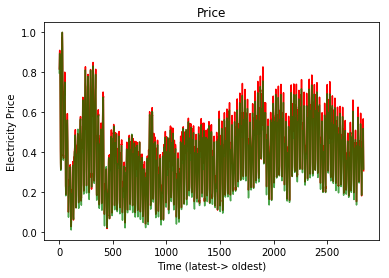

In [28]:
plt.plot(predicted_value, color= 'red')
plt.plot(testY, color='green',alpha=0.7)
plt.title("Price")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Electricity Price")
plt.show()

In [29]:
predicted_value = numpy.c_[predicted_value,test_hoep[look_back+1:,:]]

In [31]:
print(predicted_value.shape)
print(testX.shape)

(2842, 2)
(2842, 48, 2)


In [32]:
inverse_scaled_output = scaler.inverse_transform(predicted_value)
#inverse_scaled_actual = scaler.inverse_transform(testX)

In [33]:
testX[:,1].shape

(2842, 2)

In [34]:
predicted_value.shape

(2842, 2)

In [35]:
numpy.set_printoptions(suppress=True)
inverse_scaled_output

array([[20911.465  ,   136.95   ],
       [21134.758  ,   100.30999],
       [21719.705  ,    70.95   ],
       ...,
       [16362.194  ,     5.81   ],
       [15367.474  ,     2.87   ],
       [14454.355  ,     0.     ]], dtype=float32)

In [36]:
predictX, predictY = create_dataset(dataset, look_back)
predicted_dataset_value = model.predict(predictX)

In [37]:
predicted_dataset_value = numpy.c_[predicted_dataset_value,dataset_hoep[look_back+1:,:]]

In [38]:
print(predicted_dataset_value.shape)
print(predictX.shape)

(8711, 2)
(8711, 48, 2)


In [39]:
inverse_scaled_dataset_output = scaler.inverse_transform(predicted_dataset_value)
#inverse_scaled_actual = scaler.inverse_transform(testX)

In [40]:
numpy.set_printoptions(suppress=True)
inverse_scaled_dataset_output

array([[16476.73 ,    19.43 ],
       [16012.159,     0.   ],
       [15823.391,     0.   ],
       ...,
       [16362.194,     5.81 ],
       [15367.474,     2.87 ],
       [14454.355,     0.   ]], dtype=float32)

In [41]:
numpy.savetxt("full_values.csv", inverse_scaled_output, delimiter=",")

In [132]:
# import numpy as np
# x = np.array([[10,20,30], [40,50,60]])
# y = np.array([[100], [200]])
# print(np.append(x, y, axis=1))
# inverse_scaled_actual = scaler.inverse_transform(dataset[look_back:len(dataset)-1,:])
# inverse_scaled_actual[look_back:len(dataset)-1,0]

df2 = pd.read_excel(PATH+'/data/final_data.xlsx')
data_X2 = df2[['Ontario Demand', 'HOEP', 'TotalOutput','Hour']]
dataset2 = data_X2.values
dataset2 = dataset2.astype('float32')
actual_demand2 = dataset2[look_back:len(dataset2)-1,0]

In [133]:
actual_demand2 = actual_demand2.reshape(len(dataset2)-48-1,1)

In [134]:
actual_demand2

array([[16277.],
       [15835.],
       [15606.],
       ...,
       [15668.],
       [14987.],
       [14560.]], dtype=float32)

In [135]:
new_data = numpy.append(inverse_scaled_dataset_output[:,0].reshape(len(dataset2)-48-1,1), actual_demand2,axis=1)

In [136]:
# inverse_scaled_actual = scaler.inverse_transform(dataset[look_back:len(dataset)-1,:])
# inverse_scaled_actual[look_back:len(dataset)-1,0]


In [137]:
totalOP = dataset2[look_back:len(dataset2)-1,2]
totalOP = totalOP.reshape(len(dataset2)-48-1,1)

In [138]:
new_data = numpy.append(new_data, totalOP,axis=1)

In [139]:
date = df2[['Date']].values[look_back:len(dataset2)-1,0]
date = date.reshape(len(dataset2)-48-1,1)

In [140]:
hour = dataset2[look_back:len(dataset2)-1,3]
hour = hour.reshape(len(dataset2)-48-1,1)

In [143]:
new_data = numpy.append(hour,new_data,axis=1)

In [144]:
new_data = numpy.append(date,new_data,axis=1)

In [145]:
tariff = dataset2[look_back:len(dataset2)-1,1]
tariff = tariff.reshape(len(dataset2)-48-1,1)

In [146]:
new_data = numpy.append(new_data, tariff, axis=1)

In [147]:
df_new = pd.DataFrame(new_data, columns = ['Date','Hour', 'Predicted Demand', 'Actual Demand', 'Company Demand', 'Tariff'])

In [148]:
df_new.tail()

Date Hour Predicted Demand Actual Demand Company Demand Tariff
8706  2018-12-31   19          17745.7         16583          18263   1.31
8707  2018-12-31   20          16664.5         16195          17853   5.62
8708  2018-12-31   21          16362.2         15668          17736   8.95
8709  2018-12-31   22          15367.5         14987          17227   5.81
8710  2018-12-31   23          14454.4         14560          17232   2.87

In [149]:
df_new.to_excel(PATH+'/data/RL_data.xlsx')